In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift

In [2]:
drivers = pd.read_csv('datasets/driver_details.csv')
drivers.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [3]:
drivers.shape

(4000, 3)

In [4]:
drivers[drivers.isnull().any(axis= 1)]

,Driver_ID,Distance_Feature,Speeding_Feature


In [5]:
drivers.describe()

,Driver_ID,Distance_Feature,Speeding_Feature
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041522,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [6]:
drivers_fe = drivers.drop('Driver_ID', axis= 1)

### K-Means

In [7]:
params = {'n_clusters': [2,3,4,5,10,20,30]}
params_grid = ParameterGrid(params)

In [8]:
list(params_grid)

[{'n_clusters': 2},
 {'n_clusters': 3},
 {'n_clusters': 4},
 {'n_clusters': 5},
 {'n_clusters': 10},
 {'n_clusters': 20},
 {'n_clusters': 30}]

In [9]:
best_score = -1

In [10]:
model = KMeans()

In [11]:
for g in params_grid:
    model.set_params(**g)
    model.fit(drivers_fe)
    
    ss = metrics.silhouette_score(drivers_fe, model.labels_)
    print('Parameter: ', g, 'Score: ', ss)
    if ss > best_score:
        best_score = ss
        best_grid = g

Parameter:  {'n_clusters': 2} Score:  0.8490223286225532
Parameter:  {'n_clusters': 3} Score:  0.8231396834167266
Parameter:  {'n_clusters': 4} Score:  0.5911323766293183
Parameter:  {'n_clusters': 5} Score:  0.5123401764339647
Parameter:  {'n_clusters': 10} Score:  0.4372707449051688
Parameter:  {'n_clusters': 20} Score:  0.3626868677729626
Parameter:  {'n_clusters': 30} Score:  0.3536298787067359


In [12]:
best_grid

{'n_clusters': 2}

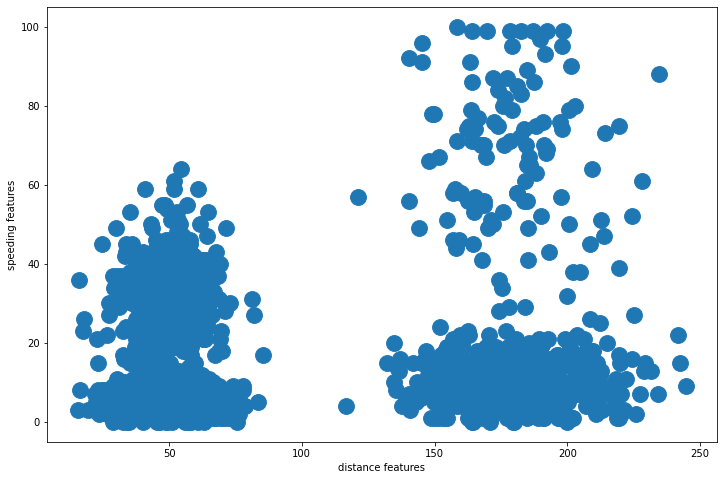

In [13]:
fig, ax = plt.subplots(figsize= (12,8))

plt.scatter(drivers_fe['Distance_Feature'],
            drivers_fe['Speeding_Feature'], s= 250)
plt.xlabel('distance features')
plt.ylabel('speeding features')

plt.show()

### DBSCAN

In [26]:
params = {'eps': [0.9, 1.0, 5.0, 10.0, 12.0, 14.0, 20.0],
          'min_samples': [5, 7, 10, 12]}
params_grid = ParameterGrid(params)
list(params_grid)

[{'eps': 0.9, 'min_samples': 5},
 {'eps': 0.9, 'min_samples': 7},
 {'eps': 0.9, 'min_samples': 10},
 {'eps': 0.9, 'min_samples': 12},
 {'eps': 1.0, 'min_samples': 5},
 {'eps': 1.0, 'min_samples': 7},
 {'eps': 1.0, 'min_samples': 10},
 {'eps': 1.0, 'min_samples': 12},
 {'eps': 5.0, 'min_samples': 5},
 {'eps': 5.0, 'min_samples': 7},
 {'eps': 5.0, 'min_samples': 10},
 {'eps': 5.0, 'min_samples': 12},
 {'eps': 10.0, 'min_samples': 5},
 {'eps': 10.0, 'min_samples': 7},
 {'eps': 10.0, 'min_samples': 10},
 {'eps': 10.0, 'min_samples': 12},
 {'eps': 12.0, 'min_samples': 5},
 {'eps': 12.0, 'min_samples': 7},
 {'eps': 12.0, 'min_samples': 10},
 {'eps': 12.0, 'min_samples': 12},
 {'eps': 14.0, 'min_samples': 5},
 {'eps': 14.0, 'min_samples': 7},
 {'eps': 14.0, 'min_samples': 10},
 {'eps': 14.0, 'min_samples': 12},
 {'eps': 20.0, 'min_samples': 5},
 {'eps': 20.0, 'min_samples': 7},
 {'eps': 20.0, 'min_samples': 10},
 {'eps': 20.0, 'min_samples': 12}]

In [27]:
best_score2 = -1
model = DBSCAN()

In [30]:
for g in params_grid:
    model.set_params(**g)
    model.fit(drivers_fe)
    
    ss = metrics.silhouette_score(drivers_fe, model.labels_)
    print('Parameter: ', g, 'Score: ', ss)
    if ss > best_score2:
        best_score2 = ss
        best_grid = g

Parameter:  {'eps': 0.9, 'min_samples': 5} Score:  -0.6057173612292268
Parameter:  {'eps': 0.9, 'min_samples': 7} Score:  -0.4265046999507063
Parameter:  {'eps': 0.9, 'min_samples': 10} Score:  -0.39254168253371013
Parameter:  {'eps': 0.9, 'min_samples': 12} Score:  -0.4286838741223884
Parameter:  {'eps': 1.0, 'min_samples': 5} Score:  -0.6155746493060738
Parameter:  {'eps': 1.0, 'min_samples': 7} Score:  -0.41637001640330673
Parameter:  {'eps': 1.0, 'min_samples': 10} Score:  -0.3837814631696031
Parameter:  {'eps': 1.0, 'min_samples': 12} Score:  -0.38648235283744914
Parameter:  {'eps': 5.0, 'min_samples': 5} Score:  0.31011275260225
Parameter:  {'eps': 5.0, 'min_samples': 7} Score:  0.7820011223700856
Parameter:  {'eps': 5.0, 'min_samples': 10} Score:  0.7974222681120255
Parameter:  {'eps': 5.0, 'min_samples': 12} Score:  0.7914367881923341
Parameter:  {'eps': 10.0, 'min_samples': 5} Score:  0.7598056658175874
Parameter:  {'eps': 10.0, 'min_samples': 7} Score:  0.8157570071704705
Par

In [31]:
best_grid

{'eps': 20.0, 'min_samples': 5}

In [32]:
model.set_params(**best_grid)
model.fit(drivers_fe)

DBSCAN(algorithm='auto', eps=20.0, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [33]:
len(model.labels_)

4000

In [35]:
n_clusters = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
n_clusters

2

In [36]:
n_noise = list(model.labels_).count(-1)
n_noise

0

In [38]:
# to demonstrate noisy points

grid = {'eps': 5.0, 'min_samples':5}

model.set_params(**grid)
model.fit(drivers_fe)

n_clusters = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
print('no. of clusters: ', n_clusters)

n_noise = list(model.labels_).count(-1)
print('noisy points: ', n_noise)

no. of clusters:  7
noisy points:  117


In [39]:
grid = {'eps': 5.0, 'min_samples':7}

model.set_params(**grid)
model.fit(drivers_fe)

n_clusters = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
print('no. of clusters: ', n_clusters)

n_noise = list(model.labels_).count(-1)
print('noisy points: ', n_noise)

no. of clusters:  3
noisy points:  157


### mean-shift

In [40]:
from sklearn.cluster import estimate_bandwidth
estimate_bandwidth(drivers_fe)

33.960524729584314

In [42]:
model = MeanShift(bandwidth= estimate_bandwidth(drivers_fe)).fit(drivers_fe)
metrics.silhouette_score(drivers_fe, model.labels_)

0.8231396834167266